In [1]:
#install vit_keras
!pip install vit_keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19582 sha256=3bc84bb158a39389e0a998f7bca53790e43767bf097dde709bb095b133ad53a5
  Stored in directory: /root/.cache/pip/wheels/5f/55/ab/36a76989f7f88d9ca7b1f68da6d94252bb6a8d6ad4f18e04e9
Successfully built validators


In [4]:
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 5.1 MB/s 


In [31]:
#import libraries
import tensorflow as tf
from tensorflow.keras import backend, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GaussianNoise, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score
from tensorflow import keras
import keras

import matplotlib.pyplot as plt
%matplotlib inline

from vit_keras import vit

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#load test data
test_directory='/content/drive/MyDrive/deep learning/Birddata/test'

In [8]:
#augment test data
test_datagen = ImageDataGenerator(rescale=1/255)
test_generator = test_datagen.flow_from_directory(
    test_directory,
    target_size=(224, 224),
    shuffle=False,
    color_mode='rgb',
    class_mode='sparse')


Found 1250 images belonging to 250 classes.


In [9]:
#load model
model = keras.models.load_model(filepath='/content/drive/MyDrive/deep learning/bird models/vit_model')

In [10]:
#create dictionary of classes
bird_dict1 = test_generator.class_indices
low_bird_dict1 = {v: i.lower().capitalize() for i, v in bird_dict1.items()}

In [11]:
#obtain predictions
predictions = model.predict(test_generator, verbose=1)

40/40 [==============================] - 308s 8s/step


In [12]:
import numpy as np

result=np.around(predictions)
result1=result.argmax(axis=1)

In [13]:
test_labels = test_generator.classes

In [14]:
#confusion matrix with normalized values
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
 
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    fig= plt.figure(figsize=(50,50))
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(test_generator.classes, result1))
  

[[5 0 0 ... 0 0 0]
 [0 5 0 ... 0 0 0]
 [0 0 5 ... 0 0 0]
 ...
 [0 0 0 ... 5 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 5]]


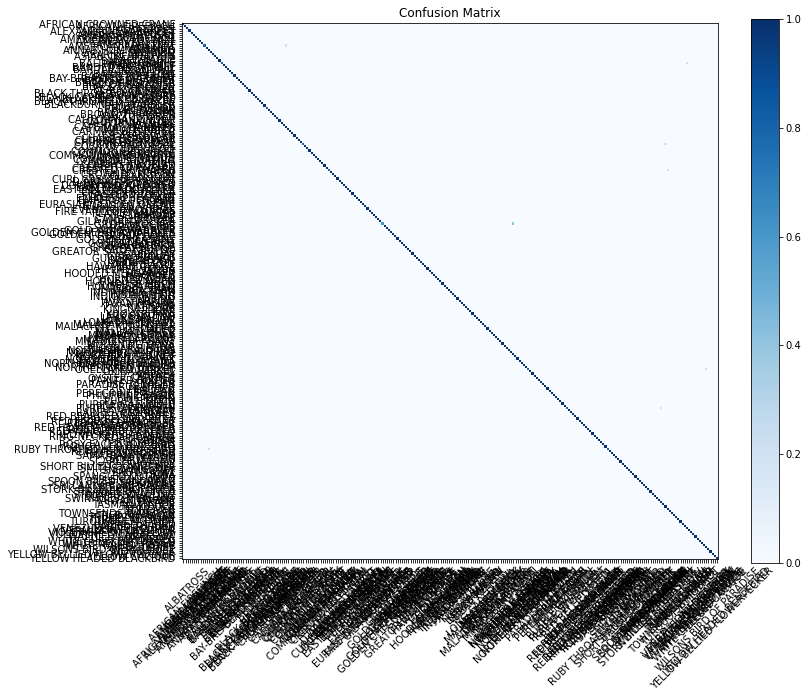

ValueError: ignored

<Figure size 3600x3600 with 1 Axes>

In [27]:
#plot confusion matrix
import itertools
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


test_labels = test_generator.classes
fig = plt.figure() 
fig.set_size_inches(12,10)

cm=confusion_matrix(test_generator.classes, result1)
cm_plot_labels =bird_dict1

plot_confusion_matrix(cm,cm_plot_labels,normalize=True, title='Confusion Matrix')



**Note:** The data has 250 classes which is too large to be displayed clearly in colab. This is the best confusion matrix that I could generate.

In [ ]:
#clasification report with precision, recall and f1 score of each class.
print(classification_report(test_generator.classes,result1, target_names=bird_dict1))

                             precision    recall  f1-score   support

      AFRICAN CROWNED CRANE       0.83      1.00      0.91         5
          AFRICAN FIREFINCH       1.00      1.00      1.00         5
                  ALBATROSS       1.00      1.00      1.00         5
       ALEXANDRINE PARAKEET       1.00      1.00      1.00         5
            AMERICAN AVOCET       1.00      1.00      1.00         5
           AMERICAN BITTERN       1.00      1.00      1.00         5
              AMERICAN COOT       1.00      1.00      1.00         5
         AMERICAN GOLDFINCH       1.00      1.00      1.00         5
           AMERICAN KESTREL       1.00      1.00      1.00         5
             AMERICAN PIPIT       1.00      1.00      1.00         5
          AMERICAN REDSTART       1.00      0.80      0.89         5
                    ANHINGA       1.00      1.00      1.00         5
          ANNAS HUMMINGBIRD       0.83      1.00      0.91         5
                    ANTBIRD      

In [37]:
f1_score(test_generator.classes, result1, average='weighted')

0.9918686868686869